# Reconocimiento de señales de tránsito y semáforos.


## Resumen
El reconocimiento automatizado de señales de tránsito y semáforos desempeña un papel crucial en la mejora de la seguridad vial y la eficiencia del tráfico en entornos urbanos y rurales. Para la realización de este trabajo se utilizó el dataset de la prueba comparativa alemana de reconocimiento de señales de tráfico (GTSRB), por sus siglas en inglés. Este contiene **43 clases** de señales de tráfico, divididas en **39.209** imágenes de entrenamiento y **12.630** imágenes de prueba.

Poder identificar y clasificar las señales de tránsito, para las empresas de manufactura de carros será una gran ventaja, permitiendo la conducción automática. Ejemplos de esto son empresas como Tesla, Ford, BMW, que ya tienen incorporado en alguno de sus modelos esta tecnología. 

- Realizar un análisis exploratorio del dataset
- Analizar los histogramas de una muestra
- Falta por poner que canales se analizaron
- Realizar transformaciones a la muestra a ver si eso mejora la imágen. 

## Integrantes
* Maria Paula Garzón Caicedo
* Juan Gabriel Góez Duque
* Gustavo Alonso Gomez Morales
* Madeleinne Paulina Henao García
* Oscar David Pérez Quintero


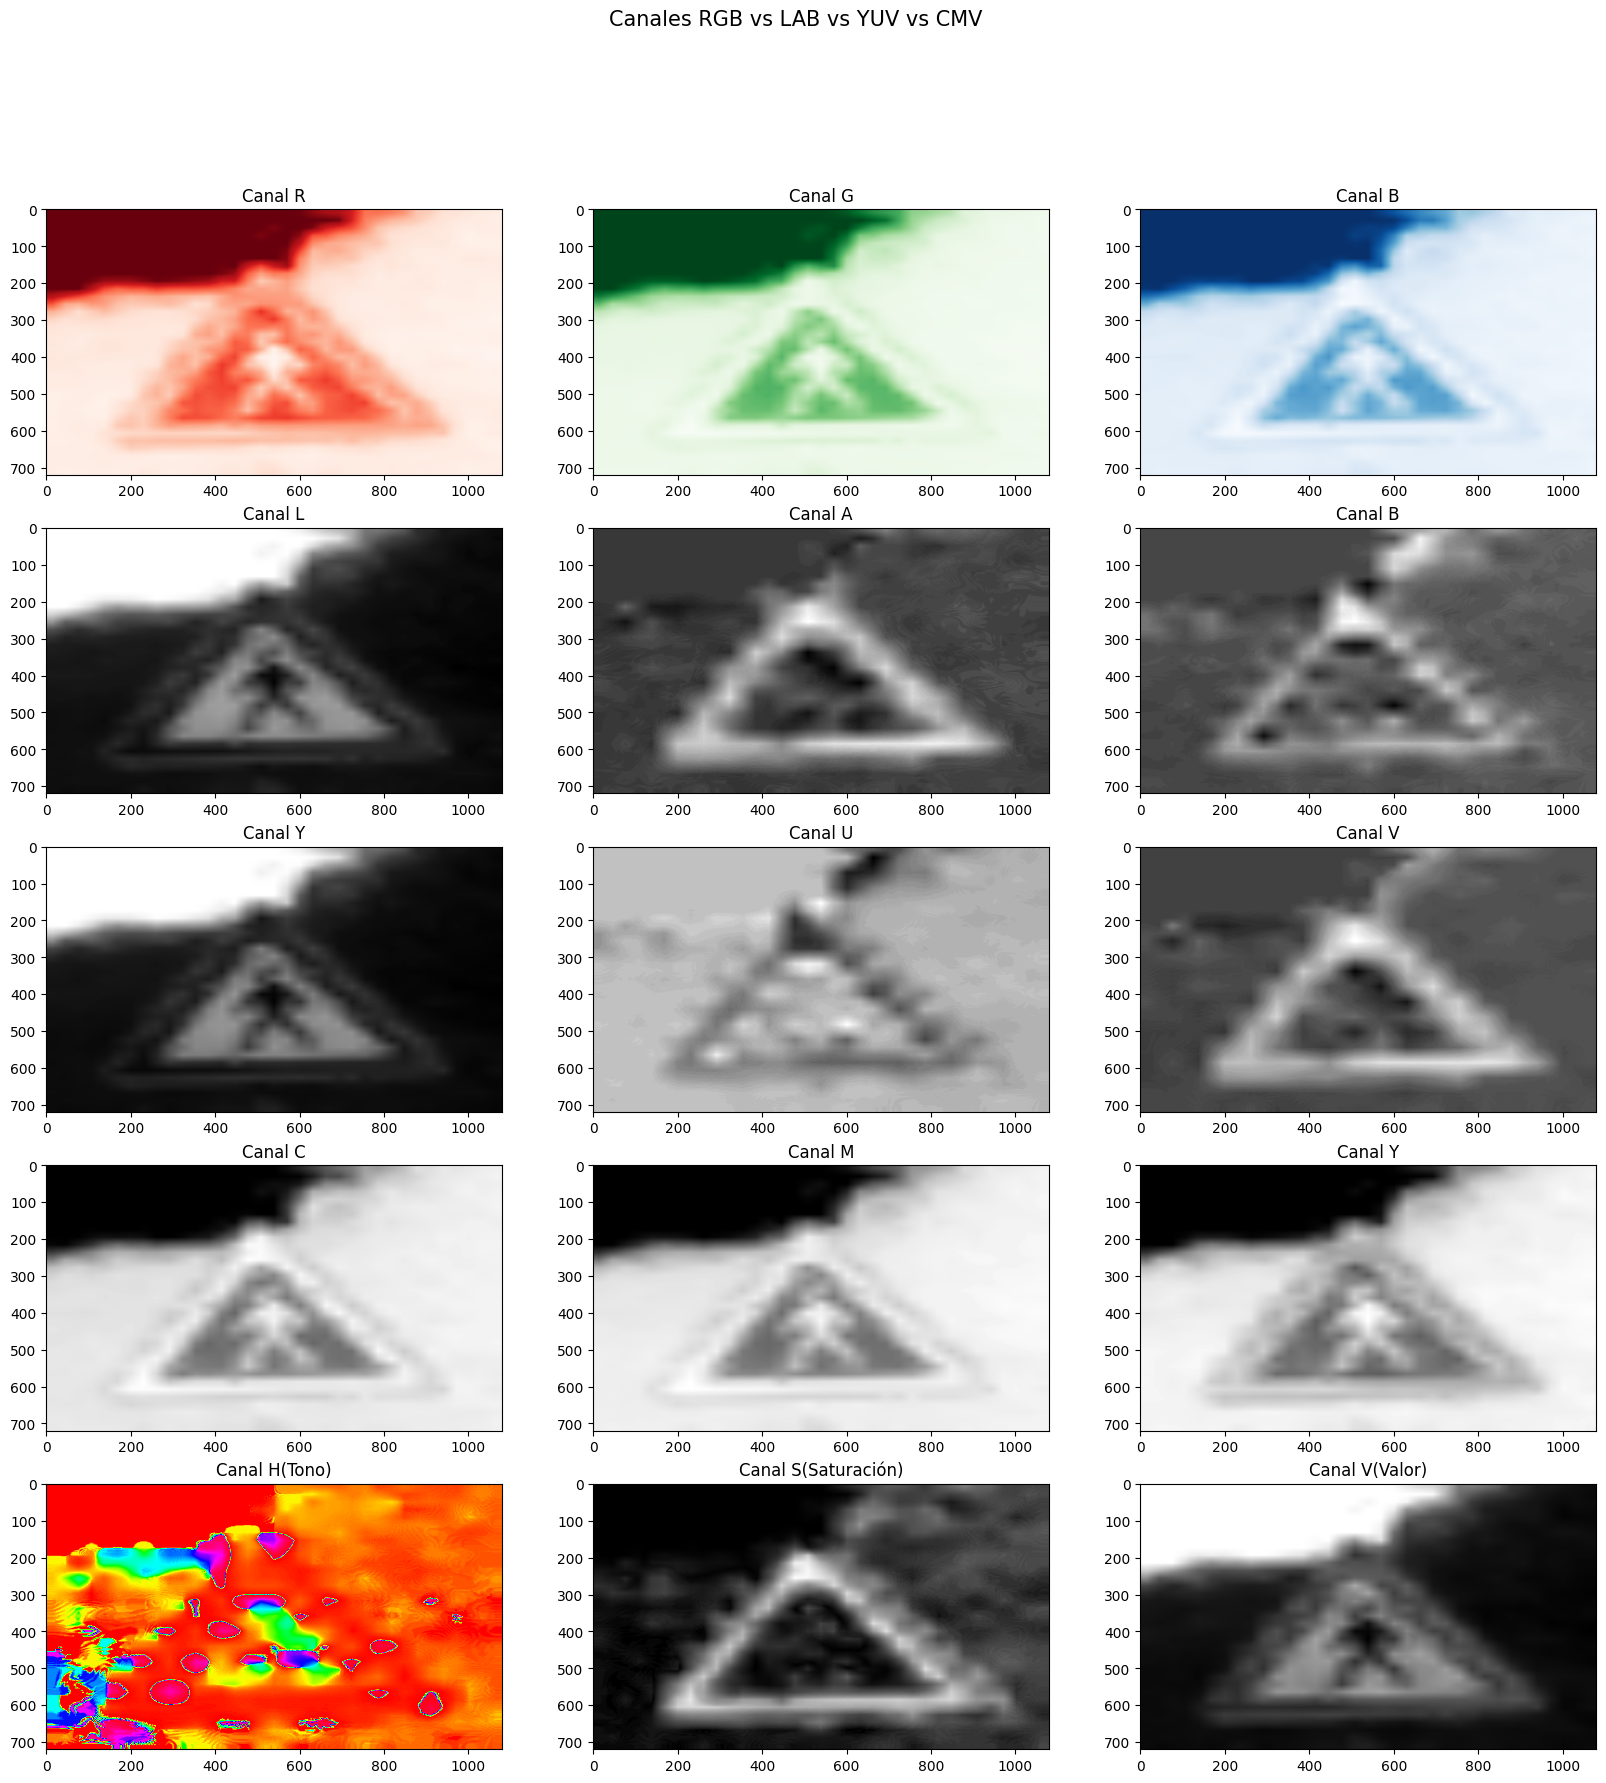

In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Creamos una función para leer las imágenes y pasarlas a RGB
def imgRead(file):
  img = cv2.imread(file)
  img = cv2.resize(img,(1080,720))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

#Leemos una imagen de nuestro dataset y la separamos en canales R,G,B
imgRGB = imgRead("Dataset/Test/00024.png")
imgRed = imgRGB[:,:,0]
imgGreen = imgRGB[:,:,1]
imgBlue = imgRGB[:,:,2]

imgLab = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2LAB)
imgL, imgA, imgB = cv2.split(imgLab)

imgYuv = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2YUV)
# Separar los canales YUV
imgY, imgU, imgV = cv2.split(imgYuv)

imgCMY = imgRGB.copy()
imgCMY = cv2.cvtColor(imgCMY,cv2.COLOR_RGB2BGR)

img_C= 255 - imgCMY[:,:,0]
img_M = 255 - imgCMY[:,:,1]
img_Y = 255 - imgCMY[:,:,2]

imgHsv = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2HSV)
    
# Separar los canales HSV
img_H, img_S, img_V = cv2.split(imgHsv)

fig, axes = plt.subplots(5, 3, figsize=(20, 20))

fig.suptitle("Canales RGB vs LAB vs YUV vs CMV", fontsize=15)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15 = axes.ravel()


ax1.set_title("Canal R")
ax1.imshow(imgRed, cmap="Reds",aspect='auto')
ax2.set_title("Canal G")
ax2.imshow(imgGreen, cmap="Greens",aspect='auto')
ax3.set_title("Canal B")
ax3.imshow(imgBlue, cmap="Blues",aspect='auto')
ax4.set_title("Canal L")
ax4.imshow(imgL, cmap="gray",aspect='auto')
ax5.set_title("Canal A")
ax5.imshow(imgA, cmap="gray",aspect='auto')
ax6.set_title("Canal B")
ax6.imshow(imgB, cmap="gray",aspect='auto')
ax7.set_title("Canal Y")
ax7.imshow(imgY, cmap="gray",aspect='auto')
ax8.set_title("Canal U")
ax8.imshow(imgU, cmap="gray",aspect='auto')
ax9.set_title("Canal V")
ax9.imshow(imgV, cmap="gray",aspect='auto')
ax10.set_title("Canal C")
ax10.imshow(img_C, cmap="gray",aspect='auto')
ax11.set_title("Canal M")
ax11.imshow(img_M, cmap="gray",aspect='auto')
ax12.set_title("Canal Y")
ax12.imshow(img_Y, cmap="gray",aspect='auto')
ax13.set_title("Canal H(Tono)")
ax13.imshow(img_H, cmap="hsv",aspect='auto')
ax14.set_title("Canal S(Saturación)")
ax14.imshow(img_S, cmap="gray",aspect='auto')
ax15.set_title("Canal V(Valor)")
ax15.imshow(img_V, cmap="gray",aspect='auto')

plt.show()




